In [634]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [635]:
'''LINEAR REGRESSION'''

path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

In [636]:
#1 Use the head and describe function to examine the data and display few columns.

print(data.describe())

data.head(5)

       Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


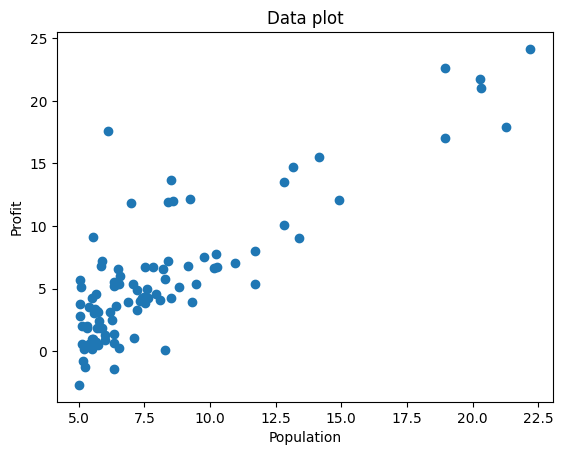

In [637]:
#2 Extract data from pandas structure to new variables of ndarray type and plot the data, where: x - population, y - profit.

x = data.values[:, 0]
y = data.values[:, 1]

plt.scatter(x, y)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Data plot')
plt.show()

In [638]:
#3 In order to make the cost function work we need to insert a column of ones at the top of x.
#4 We need to separate our data into independent variables X and our dependent variable y. We also need to initialise parameter theta.

X = np.stack([np.ones(x.shape, dtype=np.float32), x], axis=0)
y.shape = [1, y.shape[0]]
theta = np.zeros((X.shape[0], 1), dtype=np.float32)

In [639]:
#5 The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model
#  parameters, and the actual data point. Please write the cost function based on X, y and theta

def computeCost(X, y, theta):
    return sum(sum((theta.T@X - y)**2)) / (2*X.shape[1])

In [640]:
#6 Test the cost function with (theta=0). Output should be 32.07

print(computeCost(X, y, theta))

32.072733877455654


In [641]:
#7 Please implement the gradient descent algorithm: the function returns optimized values theta and a vector of the cost
#  function value for each iteration

def simple_gradient(X, y, theta, alpha, it):
    
    cost = np.zeros(it)
    
    for j in range(it):
        for i in range(X.shape[0]):
            theta[i] = theta[i] - alpha * sum( (theta.T@X - y)[0]*X[i] ) / X.shape[1]

        cost[j] = computeCost(X, y, theta)

    return theta, cost

In [642]:
#8 Please calculate the optimal parameters for the dataset.
#9 Please calculate the cost function.

alpha = 0.01
it = 1000
theta, cost = simple_gradient(X, y, theta, alpha, it)
print(theta)
print(cost)

[[-3.2508821]
 [ 1.1283631]]
[6.79372785 5.93459578 5.90142812 5.89550309 5.89036233 5.88523676
 5.88012427 5.87502915 5.86995231 5.86489387 5.85985379 5.85483201
 5.84982847 5.84484309 5.83987582 5.83492659 5.82999533 5.82508198
 5.82018647 5.81530873 5.81044871 5.80560634 5.80078155 5.79597429
 5.79118448 5.78641206 5.78165697 5.77691915 5.77219854 5.76749507
 5.76280868 5.75813931 5.75348689 5.74885137 5.74423267 5.73963076
 5.73504556 5.730477   5.72592504 5.72138961 5.71687064 5.71236808
 5.70788188 5.70341197 5.69895829 5.69452078 5.69009939 5.68569405
 5.68130471 5.67693132 5.6725738  5.66823211 5.66390618 5.65959597
 5.65530141 5.65102244 5.64675901 5.64251106 5.63827853 5.63406138
 5.62985953 5.62567294 5.62150156 5.61734534 5.61320421 5.60907812
 5.60496699 5.60087081 5.59678949 5.59272301 5.58867128 5.58463426
 5.58061192 5.57660417 5.57261099 5.56863229 5.56466804 5.56071819
 5.55678268 5.55286148 5.5489545  5.54506171 5.54118307 5.5373185
 5.53346797 5.52963141 5.5258088  

<function matplotlib.pyplot.show(close=None, block=None)>

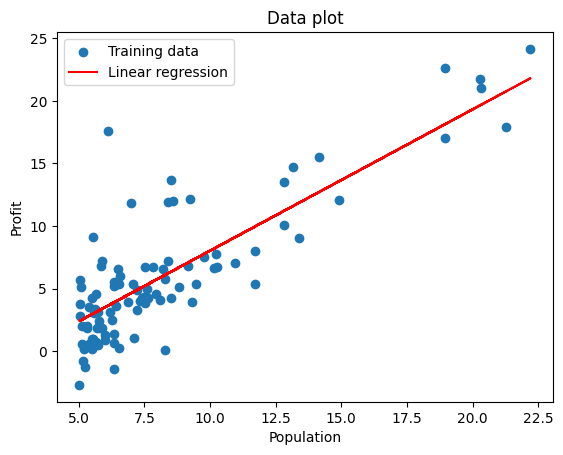

In [643]:
#10 Plot the regression function and our dataset.

plt.scatter(x, y, label='Training data')
plt.plot(x, (theta.T@X)[0], 'r-', label='Linear regression')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Data plot')
plt.legend()
plt.show

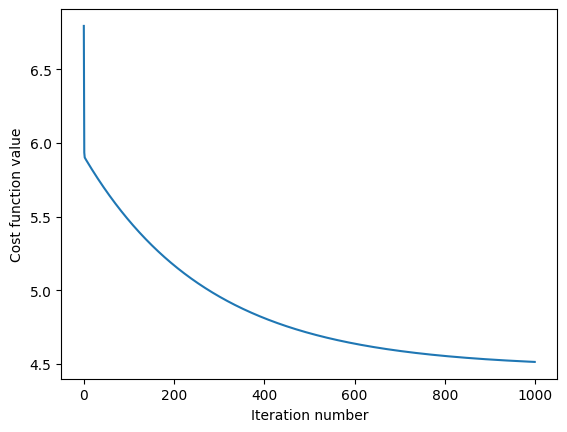

In [644]:
#11 Plot the relationship between the cost function and number of iterations.

x_1 = range(len(cost))

plt.plot(x_1, cost)
plt.xlabel('Iteration number')
plt.ylabel('Cost function value')
plt.show()

In [645]:
'''LINEAR REGRESSION WITH MULTIPLE VARIABLES'''

path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [646]:
#1 Feature normalization

def normalization(x):
    return (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0))

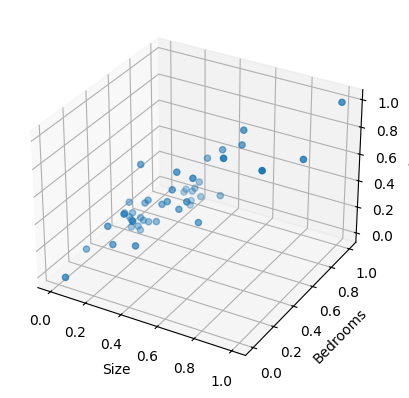

0.07899053842917521
[[0.13201685]
 [0.34098583]
 [0.16514125]]


<function matplotlib.pyplot.show(close=None, block=None)>

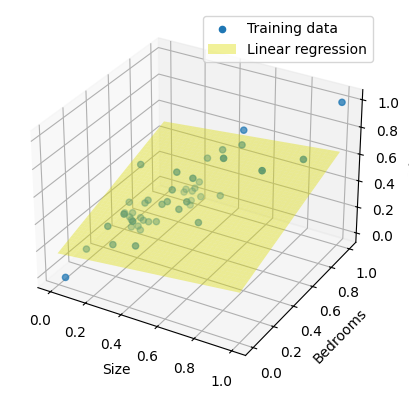

In [647]:
#2 Please perform steps 3-11 from the previous task by using the same functions.

from mpl_toolkits.mplot3d import Axes3D

x = data2.values[:, 0]
y = data2.values[:, 1]
z = data2.values[:, 2]

x = normalization(x)
y = normalization(y)
z = normalization(z)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
plt.show()


Y = np.stack([np.ones(x.shape, dtype=np.float32), x, y], axis=0)
z.shape = [1, z.shape[0]]
theta = np.zeros((Y.shape[0], 1), dtype=np.float32)


print(computeCost(Y, z, theta))


alpha = 0.01
it = 1000
theta2, cost = simple_gradient(Y, z, theta, alpha, it)
print(theta2)


xs = np.tile(np.linspace(min(Y[1]), max(Y[1]), Y.shape[1]), (Y.shape[1],1))
ys = (np.tile(np.linspace(min(Y[2]), max(Y[2]), Y.shape[1]), (Y.shape[1],1))).T
zs = xs*theta2[0] + ys*theta2[1] + theta2[2]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, label='Training data')
ax.plot_surface(xs, ys, zs, color = "yellow", alpha=0.4, label='Linear regression')
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
plt.legend()
plt.show

In [648]:
'''Linear regression - Python packages'''

import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
 
# Data import
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])

x1 = data2.values[:, 0]
x2 = data2.values[:, 1]
y = data2.values[:, 2]

# Normalization
x1 = normalization(x1)
x2 = normalization(x2)
y = normalization(y)
x = np.stack([x1, x2], axis=0)

# Split into train and test sets (70-30%)
X_train, X_test, Y_train, Y_test = train_test_split(x.T, y, test_size=0.3)

# Creating an object 
regr = linear_model.LinearRegression()
 
# Learning model on training data
regr.fit(X_train, Y_train)
# Predicting values using test data
Y_predicted = regr.predict(X_test)
 
# Regression coefficients (theta)
print('Coefficients: \n', regr.coef_)
 
#  Residual sum of squares error
error = np.mean((regr.predict(X_test) - Y_test) ** 2)
print("Residual sum of squares: {}".format(error))

Coefficients: 
 [ 0.96738959 -0.07525301]
Residual sum of squares: 0.007594964186269564
